In [3]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import beta

In [4]:
bins = 30
## TODO
number_steps = 3650
number_of_tries = 10000
####

In [3]:
def simulate_urn_model(initial_state, wr, lambdaA, lambdaB, number_steps):
  ## TODO
  states = [initial_state[0], initial_state[1]]
  wd = 1 - wr
  observed_probs = [
      [(wd*lambdaA + wr*lambdaA), (wr*lambdaB)],
      [(wr*lambdaA), (wr*lambdaB + wd*lambdaB)]
  ]

  carA_crimeA = np.random.binomial(1, p=observed_probs[0][0], size=number_steps)
  carA_crimeB = np.random.binomial(1, p=observed_probs[0][1], size=number_steps)
  carB_crimeA = np.random.binomial(1, p=observed_probs[1][0], size=number_steps)
  carB_crimeB = np.random.binomial(1, p=observed_probs[1][1], size=number_steps)

  for i in range(number_steps):
    probA = states[0] / (states[0] + states[1])
    probB = 1 - probA
    go_where = np.random.binomial(1, p=probA)

    # car to A
    if go_where == 1:
      states[0] += carA_crimeA[i]
      states[1] += carA_crimeB[i]
    else:
      states[0] += carB_crimeA[i]
      states[1] += carB_crimeB[i]

  states = tuple(states)

  ####
  return states

## 1. Balanced prior and crime rate

In [4]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.1
outcomes1 = []
for i in range(number_of_tries):
  initial_state1 = (10, 10)
  final_state = simulate_urn_model(initial_state1, wr, lambdaA, lambdaB, number_steps)
  outcomes1.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 54.8 s, sys: 94.1 ms, total: 54.9 s
Wall time: 58.7 s


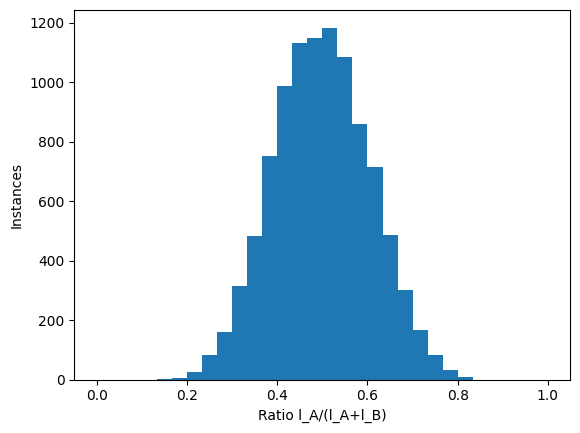

In [5]:
plt.hist(outcomes1,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [6]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes1])

0.6402

## 2. Imbalanced prior balanced crime rate

In [7]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.1
outcomes2 = []
for i in range(number_of_tries):
  initial_state2 = (15,5)
  final_state = simulate_urn_model(initial_state2,wr,lambdaA, lambdaB,number_steps)
  outcomes2.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 52.3 s, sys: 70.1 ms, total: 52.4 s
Wall time: 52.6 s


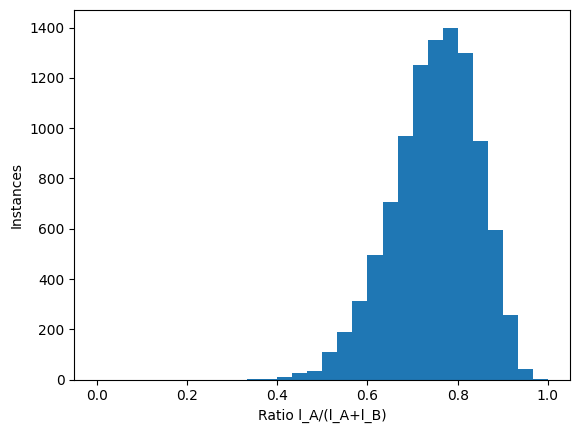

In [8]:
plt.hist(outcomes2,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [9]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes2])

0.069

## 3. Biased crime rate unbiased prior

In [10]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.11
outcomes3 = []
for i in range(number_of_tries):
  initial_state3 = (10,10)
  final_state = simulate_urn_model(initial_state3,wr,lambdaA, lambdaB,number_steps)
  outcomes3.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 54 s, sys: 87.8 ms, total: 54.1 s
Wall time: 56.2 s


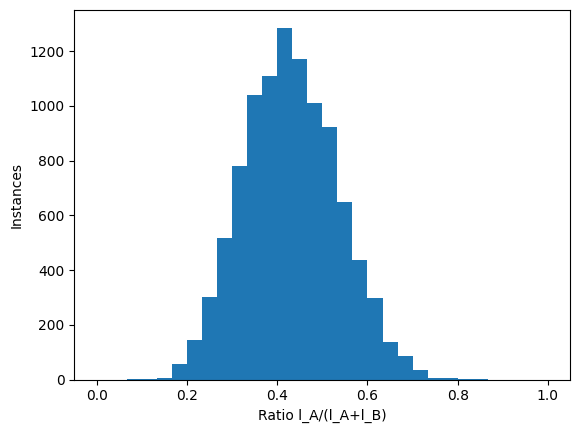

In [11]:
plt.hist(outcomes3,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [12]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes3])

0.5989

## 4 . Biased prior and crime rate

In [13]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.11
outcomes4 = []
for i in range(number_of_tries):
  initial_state4 = (15,5)
  final_state = simulate_urn_model(initial_state4,wr,lambdaA, lambdaB,number_steps)
  outcomes4.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 52.2 s, sys: 82.9 ms, total: 52.3 s
Wall time: 52.7 s


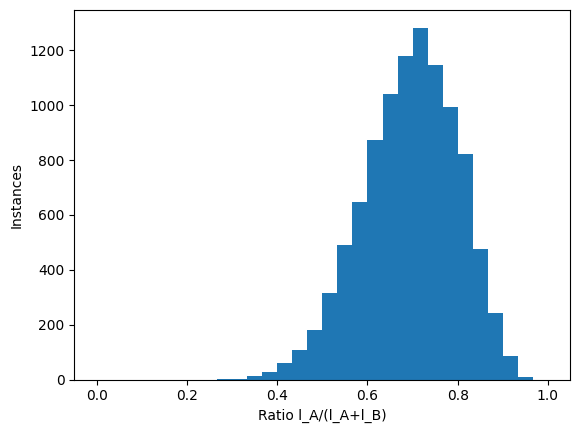

In [14]:
plt.hist(outcomes4,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [15]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes4])

0.1327

## 5. Biased crime and prior with reporting

In [16]:
%%time
wr = 0.9
lambdaA = 0.1
lambdaB = 0.11
outcomes5 = []
for i in range(number_of_tries):
  initial_state5 = (15,5)
  final_state = simulate_urn_model(initial_state5,wr,lambdaA, lambdaB,number_steps)
  outcomes5.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 52.2 s, sys: 84 ms, total: 52.3 s
Wall time: 52.5 s


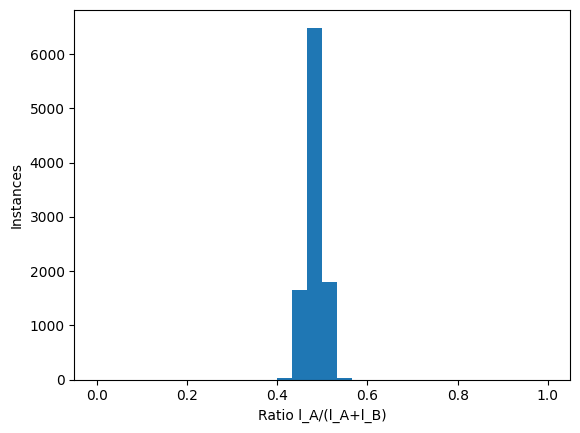

In [17]:
plt.hist(outcomes5,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [18]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes5])

1.0

## 6. Intervention

In [10]:
def simulate_urn_model_with_intervention(initial_state,wr,lambdaA, lambdaB,number_steps):
  ## TODO
  states = [initial_state[0], initial_state[1]]
  wd = 1 - wr
  observed_probs = [
      [(wd*lambdaA + wr*lambdaA), (wr*lambdaB)],
      [(wr*lambdaA), (wr*lambdaB + wd*lambdaB)]
  ]

  carA_crimeA = np.random.binomial(1, p=observed_probs[0][0], size=number_steps)
  carA_crimeB = np.random.binomial(1, p=observed_probs[0][1], size=number_steps)
  carB_crimeA = np.random.binomial(1, p=observed_probs[1][0], size=number_steps)
  carB_crimeB = np.random.binomial(1, p=observed_probs[1][1], size=number_steps)

  for i in range(number_steps):
    probA = states[0] / (states[0] + states[1])
    probB = 1 - probA

    go_where = np.random.binomial(1, p=probA)
    ## Intervention
    if i % 2 == 0:
      # Go to the opposite neighbourhood
      go_where = 1 - go_where

    # car to A
    if go_where == 1:
      states[0] += carA_crimeA[i]
      states[1] += carA_crimeB[i]
    else:
      states[0] += carB_crimeA[i]
      states[1] += carB_crimeB[i]

  states = tuple(states)
  #####
  return states

In [11]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.1
outcomes6 = []
for i in range(number_of_tries):
  initial_state6 = (15,5)
  final_state = simulate_urn_model_with_intervention(initial_state6,wr,lambdaA, lambdaB,number_steps)
  outcomes6.append(final_state[0]/(final_state[0]+final_state[1]))

CPU times: user 55.7 s, sys: 113 ms, total: 55.8 s
Wall time: 58.1 s


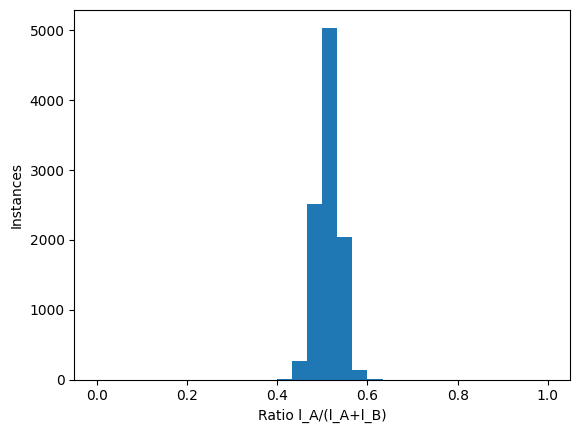

In [12]:
plt.hist(outcomes6,bins=bins,range=(0,1));
plt.xlabel("Ratio l_A/(l_A+l_B)");
plt.ylabel("Instances");

In [13]:
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes6])

0.9998

In [14]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.1
outcomes1 = []
for i in range(number_of_tries):
  initial_state1 = (10, 10)
  final_state = simulate_urn_model_with_intervention(initial_state1, wr, lambdaA, lambdaB, number_steps)
  outcomes1.append(final_state[0]/(final_state[0]+final_state[1]))
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes1])

CPU times: user 57.9 s, sys: 79.6 ms, total: 58 s
Wall time: 58.4 s


1.0

In [15]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.11
outcomes3 = []
for i in range(number_of_tries):
  initial_state3 = (10,10)
  final_state = simulate_urn_model_with_intervention(initial_state3,wr,lambdaA, lambdaB,number_steps)
  outcomes3.append(final_state[0]/(final_state[0]+final_state[1]))

np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes3])

CPU times: user 54.9 s, sys: 101 ms, total: 55 s
Wall time: 55.2 s


0.9999

In [16]:
%%time
wr = 0
lambdaA = 0.1
lambdaB = 0.11
outcomes4 = []
for i in range(number_of_tries):
  initial_state4 = (15,5)
  final_state = simulate_urn_model_with_intervention(initial_state4,wr,lambdaA, lambdaB,number_steps)
  outcomes4.append(final_state[0]/(final_state[0]+final_state[1]))

np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes4])

CPU times: user 55.8 s, sys: 80.8 ms, total: 55.9 s
Wall time: 56.1 s


0.9998

In [17]:
%%time
wr = 0.9
lambdaA = 0.1
lambdaB = 0.11
outcomes5 = []
for i in range(number_of_tries):
  initial_state5 = (15,5)
  final_state = simulate_urn_model_with_intervention(initial_state5,wr,lambdaA, lambdaB,number_steps)
  outcomes5.append(final_state[0]/(final_state[0]+final_state[1]))
np.mean([np.abs(outcome -lambdaA/(lambdaB+lambdaA)) <= 0.1 for outcome in outcomes5])

CPU times: user 55.1 s, sys: 92 ms, total: 55.2 s
Wall time: 55.4 s


1.0